# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

Har da naturlig nok tatt en del fra forelesnings notatene, og brukt Github Co-pilot.

In [236]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

1. Finn likevektspris og -kvantum for alle verdier av $t$.        


In [237]:
def demand(p):
    return 500-(3.2*p)
def supply(p,t):
    return (4.3*(p-t))-100

In [238]:
# definer symboler i sympy

x,p,t,=sp.symbols('x p t', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(demand(p),supply(p,t))
eq_cond

Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [239]:
# løs for p
p_eq=sp.solve(eq_cond,p)
#p_eq[0]

# Likevektspris som funksjon av t

p_eq_fn=sp.lambdify(
    (t), 
    p_eq[0]
)

print("Likevektspris for alle verdier av t er:", p_eq_fn(t))

Likevektspris for alle verdier av t er: 0.573333333333333*t + 80.0


In [240]:
# finn tilsvarende kvantum
x_eq=supply(p_eq[0],t)
#x_eq

# Likevektskvantum som funksjon av t

x_eq_fn=sp.lambdify(
    (t), 
    x_eq
)

print("Likevektskvantum for alle verdier av t er:", x_eq_fn(t))

Likevektskvantum for alle verdier av t er: 244.0 - 1.83466666666667*t


In [241]:
# Kvantum omsatt med avgift på kjøper på t=4
x_opt4 = x_eq_fn(4)
x_opt4

236.66133333333332

In [242]:
# prisen som konsumenten må betale er
p_kons4 = round(p_eq_fn(4),2)
p_kons4

82.29

In [243]:
# prisen som produsenten får er
p_kons4 -4

78.29

In [244]:
p_kons4 = round(p_eq_fn(4),2)
print("likevektspris med t=0 er",p_kons)

likevektspris med t=0 er 80.0


In [245]:
x_opt4 = round(x_eq_fn(4),2)
print("Likevektskvantum med t=0 er",x_opt)

Likevektskvantum med t=0 er 244.0


2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny. 

In [246]:
producer_surplus=sp.integrate(supply(p,t),(p,p_kons,0))
producer_surplus

344.0*t - 5760.0

In [247]:
consumer_surplus=sp.integrate(demand(p),(p,0,x_opt))
consumer_surplus

26742.4000000000

In [278]:
welfare_surplus=sp.integrate(demand(p)-supply(p,t),(p,0,0))
welfare_surplus

0

In [282]:
producer_surplus4=sp.integrate(supply(p,t),(p,p_kons,4))
producer_surplus4

326.8*t - 6125.6

In [280]:
consumer_surplus4=sp.integrate(demand(p),(p,4,x_opt))
consumer_surplus4

24768.0000000000

In [281]:
welfare_surplus4=sp.integrate(demand(p)-supply(p,t),(p,4,0))
welfare_surplus4

-17.2*t - 2340.0

2. Tegn likevekten for $t=0$ og fargelegg KO og PO.  

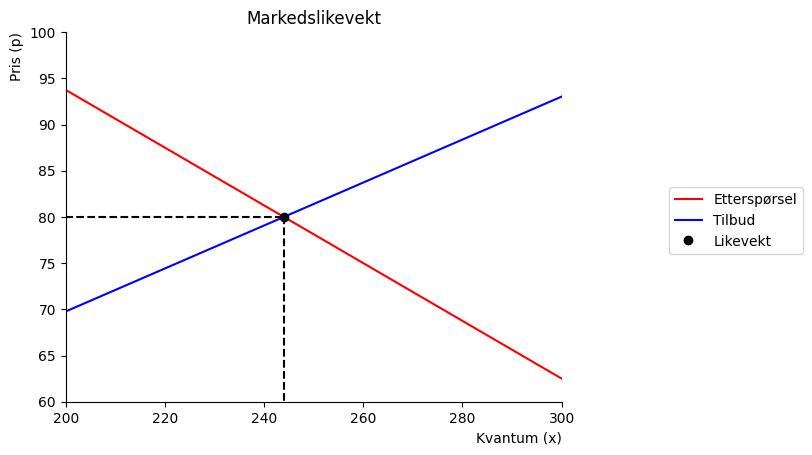

In [249]:
t_num=np.linspace(0,150,250)
q = np.linspace(0,x_opt,250)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(200,300))
                ax.set(ylim=(60,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonen

ax.plot(demand(t_num), t_num, label='Etterspørsel', color='red')
ax.plot(supply(t_num,0), t_num, label='Tilbud', color='blue')

# plott likevektspris og kvantum

ax.plot(x_opt, p_kons, 'o', color='black', label='Likevekt')

ax.hlines(p_kons, 0, x_opt, color='black', linestyle='dashed')
ax.vlines(x_opt, 0, p_kons, color='black', linestyle='dashed')

#ax.fill_between(q, p_kons, x_opt, color='green', alpha=0.2)


# tittel
ax.set_title('Markedslikevekt')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.

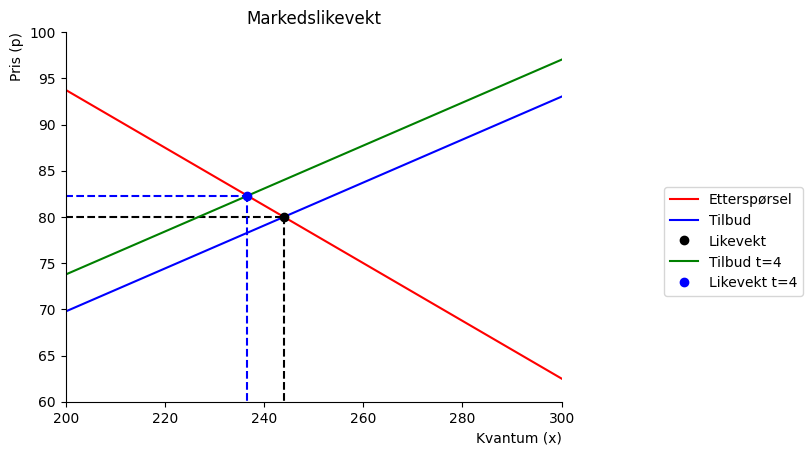

In [250]:
ax.plot(supply(t_num,4), t_num, label='Tilbud t=4', color='green')

ax.plot(x_opt4, p_kons4, 'o', color='blue', label='Likevekt t=4')

ax.hlines(p_kons4, 0, x_opt4, color='blue', linestyle='dashed')
ax.vlines(x_opt4, 0, p_kons4, color='blue', linestyle='dashed')

ax.legend(bbox_to_anchor=(1.5,0.6));


fig

4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [287]:
from IPython.display import Markdown

tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | ${np.round(float(p_kons),2)}$    | ${np.round(float(p_kons4),2)}$   | ${np.round(float(p_kons4 - p_kons),2)}$ |
|Produsentpris  | ${np.round(float(p_kons),2)}$ | ${np.round(float(p_kons4 - 4),2)}$  | ${np.round(float((p_kons4 - 4) - p_kons),2)}$ |
|Kvantum  | ${np.round(float(x_opt),2)}$ | ${np.round(float(x_opt4),2)}$  |  ${np.round(float(x_opt4 - x_opt),2)}$  |
| Konsumentoverskudd: | ${consumer_surplus}$ |  ${consumer_surplus4}$ |   ${consumer_surplus4 - consumer_surplus}$  |
| Produsentoverskudd: |  ${producer_surplus}$ | ${producer_surplus4}$  |  ${producer_surplus4 - producer_surplus}$ |
| KO + PO:    | ${consumer_surplus + producer_surplus}$   |  ${consumer_surplus4 + producer_surplus4}$  |  ${(consumer_surplus4 + producer_surplus4) - (consumer_surplus + producer_surplus)}$  |
|Skatteproveny| 0  | ${4 * x_opt4}$ |  ${(4 * x_opt4) - 0}$  |
| Dødvektstap  |0   |   ||
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   | $80.0$    | $82.29$   | $2.29$ |
|Produsentpris  | $80.0$ | $78.29$  | $-1.71$ |
|Kvantum  | $244.0$ | $236.66$  |  $-7.34$  |
| Konsumentoverskudd: | $26742.4000000000$ |  $24768.0000000000$ |   $-1974.40000000000$  |
| Produsentoverskudd: |  $344.0*t - 5760.0$ | $326.8*t - 6125.6$  |  $-17.2*t - 365.6$ |
| KO + PO:    | $344.0*t + 20982.4$   |  $326.8*t + 18642.4$  |  $-17.2*t - 2340.0$  |
|Skatteproveny| 0  | $946.64$ |  $946.64$  |
| Dødvektstap  |0   |   ||


Dette var så mye jeg fikk gjort, satt fast på ting jeg ikke forstod hvorfor jeg satte meg fart på, som fill_between.

Regner også med at noen tallene rundt KO og PO er feil, men vet ikke helt hvorfor eller hvordan jeg får rettet på det på tampen.